# Closer Challenge - Definition


Segment clients for better markting campaigns

# Imports

## Libraries

In [1]:
## Utility and Data Wrangling
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

## Plotting and Viz
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import scipy.stats as stats

## Dataset

In [2]:
dataset = pd.read_excel('../data/dataset.xlsx')

In [3]:
dfInsurance = dataset.copy()

# Dataset Global Information

## Data structure

Tamanho (\#rows): 10296   
\# Colunas: 14
Duplicados (Alto nível): 0

## Statistics by column

| Column                              | Missing Values | Mean/Top    | St.dev      |
|-------------------------------------|----------------|-------------|-------------|
| Customer Identity                   | 0              | 5148.500000 | 2972.343520 |
| First Policy´s Year                 | 30             | 1991.062634 | 511.267913  |
| Customer Age                        | 17             | 47.992217   | 19.709476   |
| Educational Degree                  | 17             | 3 - BSc/MSc | -           |
| Gross Monthly Salary                | 36             | 5012.838557 | 2314.900605 |
| Geographic Living Area              | 1              | 2.709859    | 1.266291    |
| Has Children (Y=1)                  | 21             | 0.706764    | 0.455268    |
| Customer Monetary Value             | 0              | 177.892604  | 1945.811545 |
| Claims Rate                         | 0              | 0.742785    | 2.916957    |
| Premiums in LOB: Motor              | 34             | 300.470252  | 211.914997  |
| Premiums in LOB: Household          | 0              | 210.431192  | 352.595984  |
| Premiums in LOB: Health             | 43             | 171.580833  | 296.405976  |
| Premiums in LOB: Life               | 104            | 41.855782   | 47.480632   |
| Premiums in LOB: Work Compensations | 86             | 41.277514   | 51.513572   |

# Mapping column names

| Original Column                     | Changed column     |
|-------------------------------------|--------------------|
| Customer Identity                   | cod_cust_id        |
| First Policy´s Year                 | dt_fpy             |
| Customer Age                        | atr_cust_age       |
| Educational Degree                  | dsc_edu_deg        |
| Gross Monthly Salary                | amt_gms            |
| Geographic Living Area              | atr_gla            |
| Has Children (Y=1)                  | flg_children       |
| Customer Monetary Value             | amt_cmv            |
| Claims Rate                         | rt_cr              |
| Premiums in LOB: Motor              | amt_lob_motor      |
| Premiums in LOB: Household          | amt_plob_household |
| Premiums in LOB: Health             | amt_plob_health    |
| Premiums in LOB: Life               | amt_plob_life      |
| Premiums in LOB: Work Compensations | amt_plob_wcomp     |

In [4]:
columns_map = {"Customer Identity":"cod_cust_id",
                "First Policy´s Year": "dt_fpy",
                "Customer Age": "atr_cust_age",
                "Educational Degree":"dsc_edu_deg",
                "Gross Monthly Salary": "amt_gms",
                "Geographic Living Area": "atr_gla",
                "Has Children (Y=1)":"flg_children",
                "Customer Monetary Value":"amt_cmv",
                "Claims Rate":"rt_cr",
                "Premiums in LOB: Motor":"amt_plob_motor",
                "Premiums in LOB: Household":"amt_plob_household",
                "Premiums in LOB: Health":"amt_plob_health",
                "Premiums in LOB:  Life":"amt_plob_life",
                "Premiums in LOB: Work Compensations":"amt_plob_wcomp"}

columns_map_reverse = {v: k for k, v in columns_map.items()}

dfInsurance = dfInsurance.rename(columns=columns_map)


# Questions

## Project Roadmap
* What can we ask the data to get insights.
* What can we do with the data to introduce ML techniques
---

* Pass graphs to 

* Do people with children and without children are different? (Different Distributions, Premiums, etc.)
* Are there differences between people who live in different areas? (e.g. A zone has higher criminality rates wich translate in premiums on household and higher claim rates?)
* Are there differences between people who earn more (maybe group by low, medium and high classes)
* Are there differences between more educated and less educated people? (ex. people with higher education have higher claim rates)


# Feature Engineering

- [X] Replace null values on premiums with 0 ( df.fillna(0) ) - if there is a null in any premium column, Total Premium and its respective rate returns NaN
- [X] KNN Imputation
----
- [X] (atr_edu_deg) Educational Degree to int -- Make the feature an integer to be ingested posteriorly in analysis and ML
- [X] (amt_premium_total) Premium LOB's Total -- Total of LOB's premium can be a rich feature
- [X] (atr_fpy_to_date) First Policy´s Year To Date -- Difference between first policy year to reference year (1999 (max year + 1))
- [X] (rt_plob_x_to_total) % of LOB X Premium to total -- Weight of LOB X to total premium of the customer
- [X] (fe_bin_plob_x_to_total) FE Bining Premium LOB X to Total Premium -- Binning for Premium to the total of premium of the customer (Pseudo-Supervised)
    - https://towardsdatascience.com/essential-guide-to-perform-feature-binning-using-a-decision-tree-model-90bcc66d61f9
    - Maybe adds value in profiling the customer by defining the weight of that LOB to the other LOBS.
    - [X] Minmax scale the classes
    - [X] Instead of Total premium as target, use the Customer Monetary Value
- [X] (fe_cmv_cr_quadrant_Type{1,2} Break into classes the dispersion of Customer Monetary Value VS Claims Rate
- [X] Apply FeatureTools to data - Outcome: No good results
- [X] (offset_age_fpy) Age - FPY - Age of the client when he started making business with the company
- [X] (log_var) Logarithm of features - Transformations
- [X] (minmax_var) Minmax scaler of features - Transformations
- [X] (yearly_salary) Salary of customer * 12 - The value of the yearly salary of the client
- [X] (effort_rate) Total Premium / Yearly Salary - The total cost of the premiums in the client budget.
- [X] (claims_cost) Claims Ratio * Total Premium - Actual cost of the of the claims the client activated

In [5]:
## Mapping of engineered features
## TO DO
columns_map['Premium Total'] = 'amt_premium_total'
columns_map_reverse['amt_premium_total'] = 'Premium Total'

columns_map['Educational Degree (Int)'] = 'atr_edu_deg'
columns_map_reverse['atr_edu_deg'] = 'Educational Degree (Int)'

columns_map['First Policy´s Year To Year: 1999'] = 'atr_fpy_to_date'
columns_map_reverse['atr_fpy_to_date'] = 'First Policy´s Year To Year: 1999'

## Data Constraints 

* Some clients have negative (below 0) premiums, why? (possible association with CMV?)


## Data Cohesion

* One date has a value of 53784
* One customer is 988 years old 
* CMV entry with value of -165680.424 and claim rate of 250 - decision was to remove it
* In total these were six observations that we decided to remove

## Description of the data

In [6]:
# Overview
dfInsurance.head()

,cod_cust_id,dt_fpy,atr_cust_age,dsc_edu_deg,amt_gms,atr_gla,flg_children,amt_cmv,rt_cr,amt_plob_motor,amt_plob_household,amt_plob_health,amt_plob_life,amt_plob_wcomp
0,1,1985.0,34.0,2 - High School,4354.0,1.0,1.0,380.97,0.390032,375.85,79.45,146.36,47.01,16.89
1,2,1981.0,21.0,2 - High School,1353.0,4.0,1.0,-131.13,1.116503,77.46,416.20,116.69,194.48,106.13
2,3,1991.0,46.0,1 - Basic,4554.0,3.0,0.0,504.67,0.284810,206.15,224.50,124.58,86.35,99.02
3,4,1990.0,35.0,3 - BSc/MSc,2197.0,4.0,1.0,-16.99,0.986665,182.48,43.35,311.17,35.34,28.34
4,5,1986.0,43.0,3 - BSc/MSc,3526.0,4.0,1.0,35.23,0.904281,338.62,47.80,182.59,18.78,41.45


In [7]:
# Shape dos dados
dfInsurance.shape

(10296, 14)

In [8]:
# Info dos tipos de objecto por coluna
dfInsurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cod_cust_id         10296 non-null  int64  
 1   dt_fpy              10266 non-null  float64
 2   atr_cust_age        10279 non-null  float64
 3   dsc_edu_deg         10279 non-null  object 
 4   amt_gms             10260 non-null  float64
 5   atr_gla             10295 non-null  float64
 6   flg_children        10275 non-null  float64
 7   amt_cmv             10296 non-null  float64
 8   rt_cr               10296 non-null  float64
 9   amt_plob_motor      10262 non-null  float64
 10  amt_plob_household  10296 non-null  float64
 11  amt_plob_health     10253 non-null  float64
 12  amt_plob_life       10192 non-null  float64
 13  amt_plob_wcomp      10210 non-null  float64
dtypes: float64(12), int64(1), object(1)
memory usage: 1.1+ MB


In [9]:
# Valores nulos das colunas
dfInsurance.isna().sum()

cod_cust_id             0
dt_fpy                 30
atr_cust_age           17
dsc_edu_deg            17
amt_gms                36
atr_gla                 1
flg_children           21
amt_cmv                 0
rt_cr                   0
amt_plob_motor         34
amt_plob_household      0
amt_plob_health        43
amt_plob_life         104
amt_plob_wcomp         86
dtype: int64

### Missing values distribution

<AxesSubplot:title={'center':'Percentage of missing values per feature'}, ylabel='Ratio of missing values per feature'>

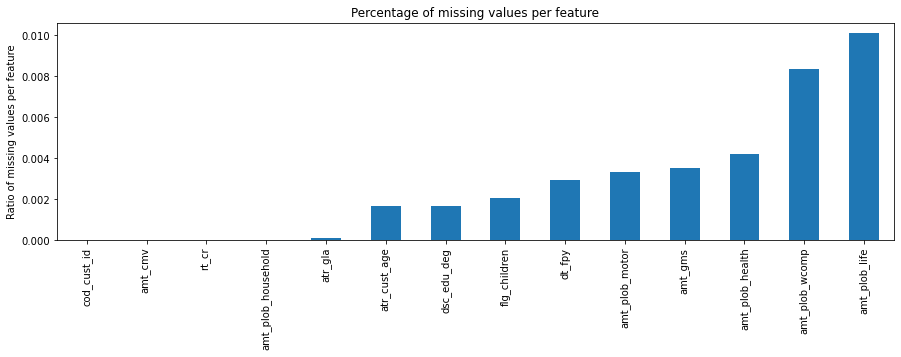

In [10]:
dfInsurance.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature")

### Check for duplicates across all rows besides customer ID

By checking for duplicate rows across all columns there are none, however if we remove the customer ID column then there are three pairs of rows with exactly the same values, only differing in the customer ID. Decision: remove them

In [11]:
# Check for duplicates
dfInsurance.duplicated(subset=dfInsurance.columns.difference(['cod_cust_id'])).sum() #without id column


3

In [12]:
dfInsurance[dfInsurance.duplicated(subset=dfInsurance.columns.difference(['cod_cust_id']), keep=False)]


,cod_cust_id,dt_fpy,atr_cust_age,dsc_edu_deg,amt_gms,atr_gla,flg_children,amt_cmv,rt_cr,amt_plob_motor,amt_plob_household,amt_plob_health,amt_plob_life,amt_plob_wcomp
2075,2076,1977.0,42.0,2 - High School,4407.0,4.0,1.0,-22.11,0.995568,214.93,88.90,266.94,39.23,42.12
2099,2100,1987.0,29.0,2 - High School,3824.0,4.0,1.0,290.61,0.579074,202.37,177.25,306.39,63.90,-0.11
3506,3507,1986.0,64.0,2 - High School,7800.0,4.0,0.0,-119.35,1.096030,163.03,481.75,224.82,94.35,18.56
8013,8014,1987.0,29.0,2 - High School,3824.0,4.0,1.0,290.61,0.579074,202.37,177.25,306.39,63.90,-0.11
8121,8122,1977.0,42.0,2 - High School,4407.0,4.0,1.0,-22.11,0.995568,214.93,88.90,266.94,39.23,42.12
9553,9554,1986.0,64.0,2 - High School,7800.0,4.0,0.0,-119.35,1.096030,163.03,481.75,224.82,94.35,18.56


##### Remove duplicates

In [13]:
#Drops duplicates except for the first occurrence
dfInsurance = dfInsurance.drop_duplicates(subset=dfInsurance.columns.difference(['cod_cust_id']))

dfInsurance.duplicated(subset=dfInsurance.columns.difference(['cod_cust_id'])).sum()

0

# Filters

## Impossible values 

We found at least two datapoints that have no conceptual sense.   
One where the first policy year is FAR into the future, and another where the customer age is simply impossible.  
The first we filtered to no data above 2022, the second for no customer age above 100 years of age.

In [14]:
dfInsurance_old = dfInsurance.copy()

In [15]:
dfInsurance = dfInsurance.loc[~((dfInsurance['dt_fpy'] > 2022) | 
                        (dfInsurance['atr_cust_age'] > 100))]

In [16]:
dfInsurance.shape[0]

10291

## Outliers 

[!] To verify CMV and CR outliers

In [17]:
def interquartile_range(column):
    """Checks if data is 1.5 times the interquartile range greater than the third quartile (Q3) 
    or 1.5 times the interquartile range less than the first quartile (Q1)
    
    param column: a series or column from a dataset containing numerical data 
    output: returns the superior and inferior values where observations are below or above 1.5 times the interquartile range 
    """
    distance = 1.5 * (np.nanpercentile(column, 75) - np.nanpercentile(column, 25))
    lim_sup= distance + np.nanpercentile(column, 90)
    lim_inf= np.nanpercentile(column, 10) - distance
    
    return lim_sup, lim_inf


We will create a new column called outlier_candidate to mark all the values that are above or lower the interquartile ranges limits

In [18]:
dfInsurance['outlier_candidate'] = ''
for column in dfInsurance.columns[1:-2]:
    if column not in('cod_cust_id', 'dt_fpy', 'atr_cust_age', 'dsc_edu_deg', 'atr_gla', 'flg_children'):
        
        lim_sup, lim_inf = interquartile_range(dfInsurance[column])

        dfInsurance['outlier_candidate'] = np.where((dfInsurance[column] > lim_sup) | (dfInsurance[column] < lim_inf), dfInsurance['outlier_candidate'].astype(str) +'%' + column, dfInsurance['outlier_candidate'])

dfInsurance['outlier_candidate'] = dfInsurance['outlier_candidate'].apply(lambda x: x.lstrip('%'))
dfInsurance['outlier_candidate'].unique()

array(['', 'amt_plob_life', 'amt_cmv%rt_cr',
       'amt_plob_household%amt_plob_life', 'amt_plob_household',
       'amt_cmv', 'amt_cmv%amt_plob_household', 'amt_plob_health',
       'amt_cmv%amt_plob_household%amt_plob_life', 'amt_plob_motor',
       'amt_plob_motor%amt_plob_health',
       'amt_cmv%amt_plob_motor%amt_plob_health', 'amt_gms',
       'amt_cmv%amt_plob_motor', 'amt_cmv%amt_plob_health', 'rt_cr'],
      dtype=object)

In [19]:
dfInsurance['outlier_candidate'].value_counts()

                                            9789
amt_plob_life                                239
amt_plob_household                           167
amt_cmv%amt_plob_household                    37
amt_plob_household%amt_plob_life              22
amt_cmv%rt_cr                                 14
amt_cmv%amt_plob_household%amt_plob_life       5
amt_cmv                                        4
amt_plob_health                                4
amt_plob_motor                                 2
amt_gms                                        2
amt_cmv%amt_plob_motor                         2
amt_plob_motor%amt_plob_health                 1
amt_cmv%amt_plob_motor%amt_plob_health         1
amt_cmv%amt_plob_health                        1
rt_cr                                          1
Name: outlier_candidate, dtype: int64

### Cut Dataset + Calculate Premium Totals

Distribution of the data was analysed on "Data visualization.ipynb" notebook and on that basis some more extreme values were marked as potential outliers to be thrown away

In [20]:
# Total de premiums (LOBs)
dfInsurance['amt_premium_total'] = (dfInsurance['amt_plob_life'] + dfInsurance['amt_plob_household'] + dfInsurance['amt_plob_motor'] + 
                                    dfInsurance['amt_plob_health']+ dfInsurance['amt_plob_wcomp'])

dfInsurance['DATA_MAIN_CUT'] = np.where(((dfInsurance['dt_fpy'] > 2022) | 
                        (dfInsurance['atr_cust_age'] > 100) | 
                        (dfInsurance['amt_cmv'] < -160000) |
                        (dfInsurance['amt_gms']> 15000) |
                        (dfInsurance['rt_cr'] > 2) |
                        (dfInsurance['amt_plob_motor'] > 2000)|
                        (dfInsurance['amt_plob_household'] > 5000)|
                        (dfInsurance['amt_plob_health'] > 5000)|
                        (dfInsurance['amt_plob_wcomp'] > 500)|
                        (dfInsurance['amt_premium_total'] > 5000)), 'THROW','KEEP')

# Transformations & Feature Engineering

## Fill null values

In [21]:
dfInsurance.isnull().sum()

cod_cust_id             0
dt_fpy                 30
atr_cust_age           17
dsc_edu_deg            17
amt_gms                36
atr_gla                 1
flg_children           21
amt_cmv                 0
rt_cr                   0
amt_plob_motor         34
amt_plob_household      0
amt_plob_health        43
amt_plob_life         104
amt_plob_wcomp         86
outlier_candidate       0
amt_premium_total     225
DATA_MAIN_CUT           0
dtype: int64

## Data type conversions

In [22]:
dfInsurance['atr_edu_deg'] = dfInsurance['dsc_edu_deg'].map(lambda x: str(x)[0])

In [23]:
dfInsurance['dsc_edu_deg'].unique()

array(['2 - High School', '1 - Basic', '3 - BSc/MSc', '4 - PhD', nan],
      dtype=object)

In [24]:
dfInsurance['atr_edu_deg'].unique()

array(['2', '1', '3', '4', 'n'], dtype=object)

In [25]:
# replace values 'n' from column atr_edu_deg for NaN
dfInsurance['atr_edu_deg'] = dfInsurance['atr_edu_deg'].replace('n', np.NaN)
#convert to numeric column atr_edu_deg
dfInsurance['atr_edu_deg'] = pd.to_numeric(dfInsurance['atr_edu_deg'])

### Using KNNImputer to fill missing values

In [26]:
dfInsurance.reset_index(inplace=True, drop = True)
CONSIDER_COLUMNS = [column for column in dfInsurance.select_dtypes(include=['int64', 'float64']) if column not in ['cod_cust_id']]
X = dfInsurance.loc[:, dfInsurance.columns.isin(CONSIDER_COLUMNS)]
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)

#imputer_column_names = ['dt_fpy', 'atr_cust_age', 'amt_gms', 'atr_gla', 'amt_cmv', 'rt_cr', 'amt_plob_motor', 'amt_plob_household', 'amt_plob_health', 'amt_plob_life', 'amt_plob_wcomp', 'atr_edu_deg']

dfX = pd.DataFrame(data=Xtrans, columns=CONSIDER_COLUMNS)
dfInsurance.update(dfX)


In [27]:
dfInsurance['dt_fpy'] = dfInsurance['dt_fpy'].astype('int64')
dfInsurance['atr_cust_age'] = dfInsurance['atr_cust_age'].astype('int64')
dfInsurance['atr_gla'] = dfInsurance['atr_gla'].astype('int64')
dfInsurance['flg_children'] = dfInsurance['flg_children'].astype('int64')

## Premium LOB's - Total

In [28]:
# Total de premiums (LOBs)
dfInsurance['amt_premium_total'] = (dfInsurance['amt_plob_life'] + dfInsurance['amt_plob_household'] + dfInsurance['amt_plob_motor'] + 
                                    dfInsurance['amt_plob_health']+ dfInsurance['amt_plob_wcomp'])

## First Policy Year to Reference Year (1998)

In [29]:
# First Policy Year to Reference Year
dfInsurance['dt_fpy'] = dfInsurance['dt_fpy'].astype('int64')
dfInsurance['atr_fpy_to_date'] = pd.Series(1998 - dfInsurance['dt_fpy'], dtype="Int32")

## Customer Yearly Salary

Gross Monthly Salary * 12 

In [30]:
dfInsurance['amt_gys'] = dfInsurance['amt_gms'] * 12

## Customer Claims Cost

Claims Ratio = (Claims / Premiums)

Claims = (Claims Ratio * Premiums)

In [31]:
dfInsurance['amt_claims_total'] = dfInsurance['rt_cr'] * dfInsurance['amt_premium_total']

## Customer Premiums And Claims Cost to Yearly and Monthly Salary 

Rate of Premium = (Total Premium / Gross Yearly Salary)
Rate of Claims = (Total Claim Cost / Gross Yearly Salary)

In [32]:
## Yearly
dfInsurance['rt_premiums_year'] = dfInsurance['amt_premium_total'] / dfInsurance['amt_gys']
dfInsurance['rt_claims_year'] = dfInsurance['amt_claims_total'] / dfInsurance['amt_gys']


## % of LOB X Premium to total

In [33]:
dfInsurance['rt_plob_life'] = (dfInsurance['amt_plob_life'] / dfInsurance['amt_premium_total'])
dfInsurance['rt_plob_household'] = (dfInsurance['amt_plob_household'] / dfInsurance['amt_premium_total'])
dfInsurance['rt_plob_motor'] = (dfInsurance['amt_plob_motor'] / dfInsurance['amt_premium_total'])
dfInsurance['rt_plob_health'] = (dfInsurance['amt_plob_health'] / dfInsurance['amt_premium_total'])
dfInsurance['rt_plob_wcomp'] = (dfInsurance['amt_plob_wcomp'] / dfInsurance['amt_premium_total'])

## Binning LOB Premiums based on Total Premium

**To avoid data leakeage**, this step should be done after a train/test split. I will perform an ephemeral split here, just as a concept for the future

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

np.random.seed(42)
if "Set" not in dfInsurance.columns:
    dfInsurance["Set"] = np.random.choice(["train", "test"], p =[.7, .3], size=(dfInsurance.shape[0],))
    
dfInsuranceTrain = dfInsurance.loc[dfInsurance.Set == 'train']
dfInsuranceTest = dfInsurance.loc[dfInsurance.Set == 'test']

### LOB: Motor

In [35]:
params = {'max_depth':[1,2,3], 'min_samples_leaf':[10], 'criterion':['absolute_error','squared_error','poisson']}
lob_motor_reg = DecisionTreeRegressor(random_state=42)
lob_motor_reg_gs = GridSearchCV(lob_motor_reg, param_grid=params, scoring='r2')
lob_motor_reg_gs.fit(dfInsuranceTrain[['amt_plob_motor']], dfInsuranceTrain['amt_premium_total'])

GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'criterion': ['absolute_error', 'squared_error',
                                       'poisson'],
                         'max_depth': [1, 2, 3], 'min_samples_leaf': [10]},
             scoring='r2')

In [36]:
lob_motor_reg_gs.best_params_

{'criterion': 'absolute_error', 'max_depth': 3, 'min_samples_leaf': 10}

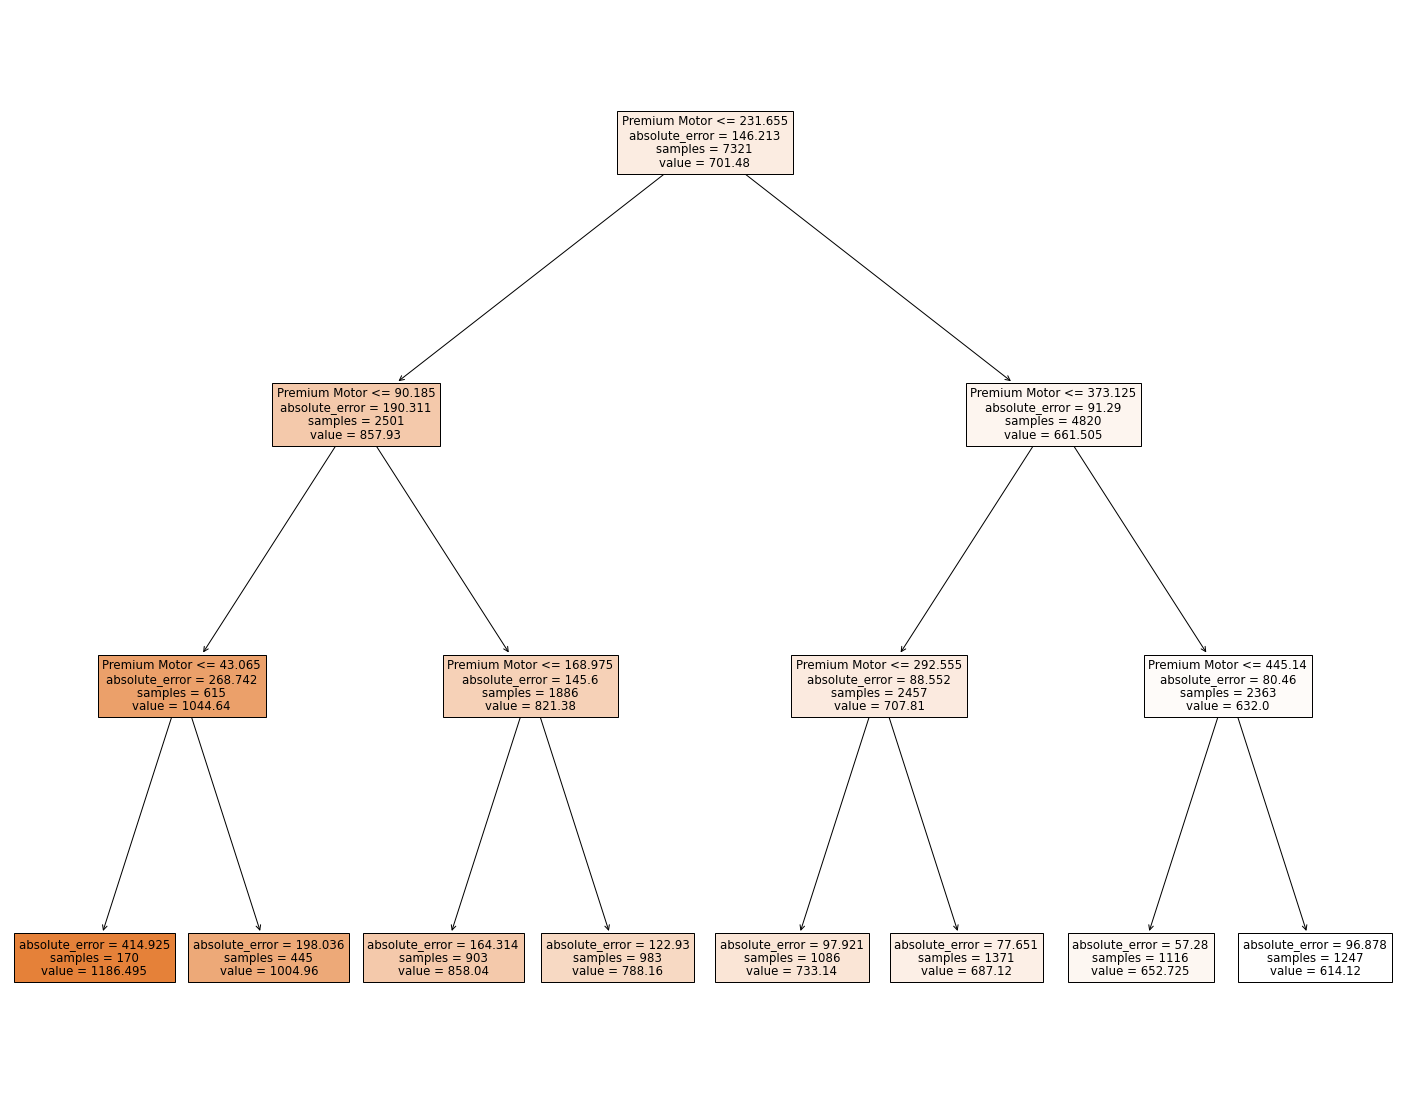

In [37]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(lob_motor_reg_gs.best_estimator_, feature_names=['Premium Motor'], filled=True)

Cut where Absolute error < 100, or the maximum split.   
Motor Rules:
   * CLASS A: $P > €404 $
   * CLASS B: $€225 < P <= €404 $
   * CLASS C: $€168 < P <= €225$
   * CLASS D: $€90  < P <= €168$
   * CLASS E: $€2.40 < P <= €90 $
   * CLASS F: $P <= €2.40$
   
This and all other classes, should have, 6 Classes ideally, 8 maximum.  
[!] Why? Intuition.

In [38]:
# https://stackoverflow.com/questions/39109045/numpy-where-with-multiple-conditions
col = 'amt_plob_motor'
conditions_motor = [dfInsurance[col] > 404, 
              (dfInsurance[col] > 225) & (dfInsurance[col] <= 404), 
              (dfInsurance[col] > 168) & (dfInsurance[col] <= 225),
              (dfInsurance[col] > 90) & (dfInsurance[col] <= 168),
              (dfInsurance[col] > 2.40) & (dfInsurance[col] <= 90),
              (dfInsurance[col] > 0) & (dfInsurance[col] <= 2.40),
              (dfInsurance[col] == 0),
              (dfInsurance[col] < 0)]
choices = [ "A", 'B', 'C', 'D', 'E', 'F', 'ZEROS','NEGATIVES']
dfInsurance["fe_bin_plob_motor"] = np.select(conditions_motor, choices, default=np.nan)
choices = [6, 5, 4, 3, 2, 1, 0, -1]
dfInsurance["fe_int_plob_motor_b"] = np.select(conditions_motor, choices, default=np.nan)
dfInsurance["fe_int_plob_motor_a"] = dfInsurance["fe_int_plob_motor_b"]-1

g = dfInsurance.groupby(['DATA_MAIN_CUT', 'fe_bin_plob_motor'])['amt_plob_motor']
min_, max_ = g.transform('min'), g.transform('max')
dfInsurance['fe_amt_plob_motor' + '_scale'] = round((((dfInsurance["fe_int_plob_motor_b"]-dfInsurance["fe_int_plob_motor_a"])*(dfInsurance['amt_plob_motor'] - min_)) / 
                                                (max_ - min_)) + dfInsurance["fe_int_plob_motor_a"],5)
dfInsurance.drop(columns = ['fe_int_plob_motor_a', 'fe_int_plob_motor_b'], inplace=True)
dfInsurance['fe_amt_plob_motor' + '_scale'] = dfInsurance['fe_amt_plob_motor' + '_scale'].fillna(0)

### LOB: Life

In [39]:
params = {'max_depth':[1,2,3], 'min_samples_leaf':[10], 'criterion':['absolute_error','squared_error','poisson']}
lob_life_reg = DecisionTreeRegressor(random_state=42)
lob_life_reg_gs = GridSearchCV(lob_life_reg, param_grid=params, scoring='r2')
lob_life_reg_gs.fit(dfInsuranceTrain[['amt_plob_life']], dfInsuranceTrain['amt_premium_total'])

GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'criterion': ['absolute_error', 'squared_error',
                                       'poisson'],
                         'max_depth': [1, 2, 3], 'min_samples_leaf': [10]},
             scoring='r2')

In [40]:
lob_life_reg_gs.best_params_

{'criterion': 'absolute_error', 'max_depth': 3, 'min_samples_leaf': 10}

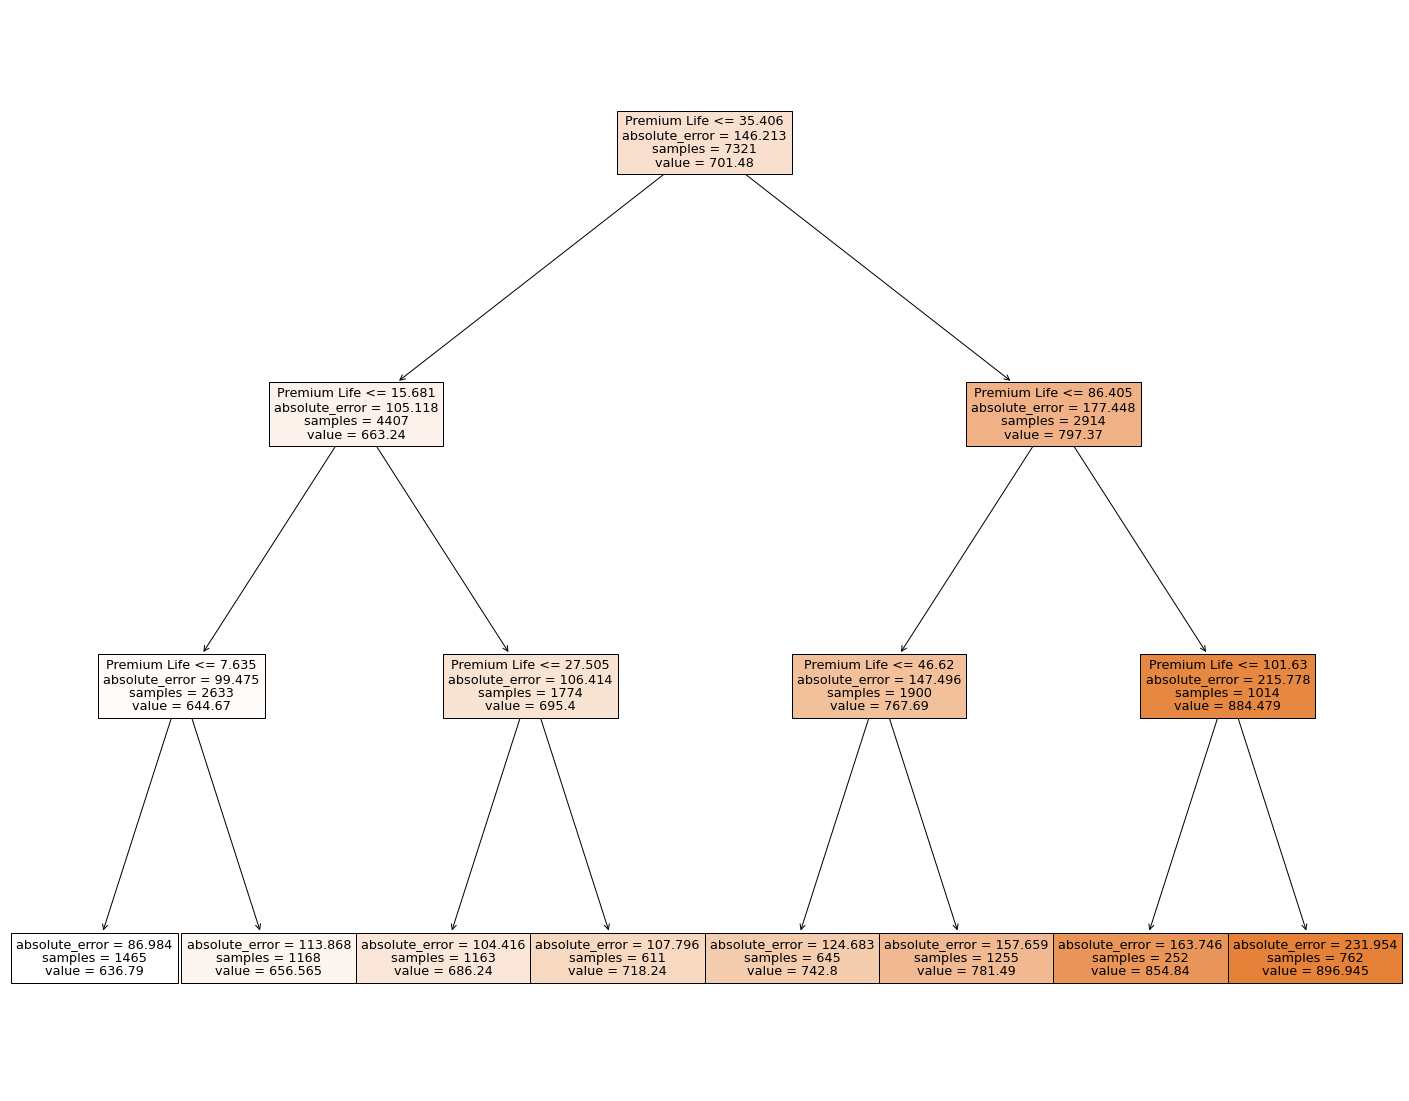

In [41]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(lob_life_reg_gs.best_estimator_, feature_names=['Premium Life'], class_names=['Total Premium'], filled=True)

Cut where Absolute error < 100, or the maximum split.   
Life Rules:
   * CLASS A: $P > €131.5 $
   * CLASS B: $€86.4 < P <= €131.5$
   * CLASS C: $€58 < P <= €86.4$
   * CLASS D: $€35.84  < P <= €58$
   * CLASS E: $€26.5 < P <= €35.84$
   * CLASS F: $€14.2 < P <= €26.5$
   * CLASS G: $€7.4 < P <= €14.2$
   * CLASS H: $P <= €7.4$

In [42]:
col = 'amt_plob_life'
conditions_life = [dfInsurance[col] > 131.5, 
              (dfInsurance[col] > 86.4) & (dfInsurance[col] <= 131.5), 
              (dfInsurance[col] > 58) & (dfInsurance[col] <= 86.4),
              (dfInsurance[col] > 35.84) & (dfInsurance[col] <= 58),
              (dfInsurance[col] > 26.5) & (dfInsurance[col] <= 35.84),
              (dfInsurance[col] > 14.2) & (dfInsurance[col] <= 26.5),
              (dfInsurance[col] > 7.4) & (dfInsurance[col] <= 14.2),
              (dfInsurance[col] > 0) & (dfInsurance[col] <= 7.4),
              (dfInsurance[col] == 0),
              (dfInsurance[col] < 0)]
choices = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'ZEROS','NEGATIVES']
dfInsurance["fe_bin_plob_life"] = np.select(conditions_life, choices, default=np.nan)

choices = [8,7,6, 5, 4, 3, 2, 1, 0, -1]
dfInsurance["fe_int_plob_life_b"] = np.select(conditions_life, choices, default=np.nan)
dfInsurance["fe_int_plob_life_a"] = dfInsurance["fe_int_plob_life_b"]-1

g = dfInsurance.groupby(['DATA_MAIN_CUT', 'fe_bin_plob_life'])['amt_plob_life']
min_, max_ = g.transform('min'), g.transform('max')
dfInsurance['fe_amt_plob_life' + '_scale'] = round((((dfInsurance["fe_int_plob_life_b"]-dfInsurance["fe_int_plob_life_a"])*(dfInsurance['amt_plob_life'] - min_)) / 
                                                (max_ - min_)) + dfInsurance["fe_int_plob_life_a"],5)
dfInsurance.drop(columns = ['fe_int_plob_life_a', 'fe_int_plob_life_b'], inplace=True)
dfInsurance['fe_amt_plob_life' + '_scale'] = dfInsurance['fe_amt_plob_life' + '_scale'].fillna(0)

### LOB: Health

In [43]:
params = {'max_depth':[1,2,3], 'min_samples_leaf':[10], 'criterion':['absolute_error','squared_error','poisson']}
lob_health_reg = DecisionTreeRegressor(random_state=42)
lob_health_reg_gs = GridSearchCV(lob_health_reg, param_grid=params, scoring='r2')
lob_health_reg_gs.fit(dfInsuranceTrain[['amt_plob_health']], dfInsuranceTrain['amt_premium_total'])

GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'criterion': ['absolute_error', 'squared_error',
                                       'poisson'],
                         'max_depth': [1, 2, 3], 'min_samples_leaf': [10]},
             scoring='r2')

In [44]:
lob_health_reg_gs.best_params_

{'criterion': 'absolute_error', 'max_depth': 2, 'min_samples_leaf': 10}

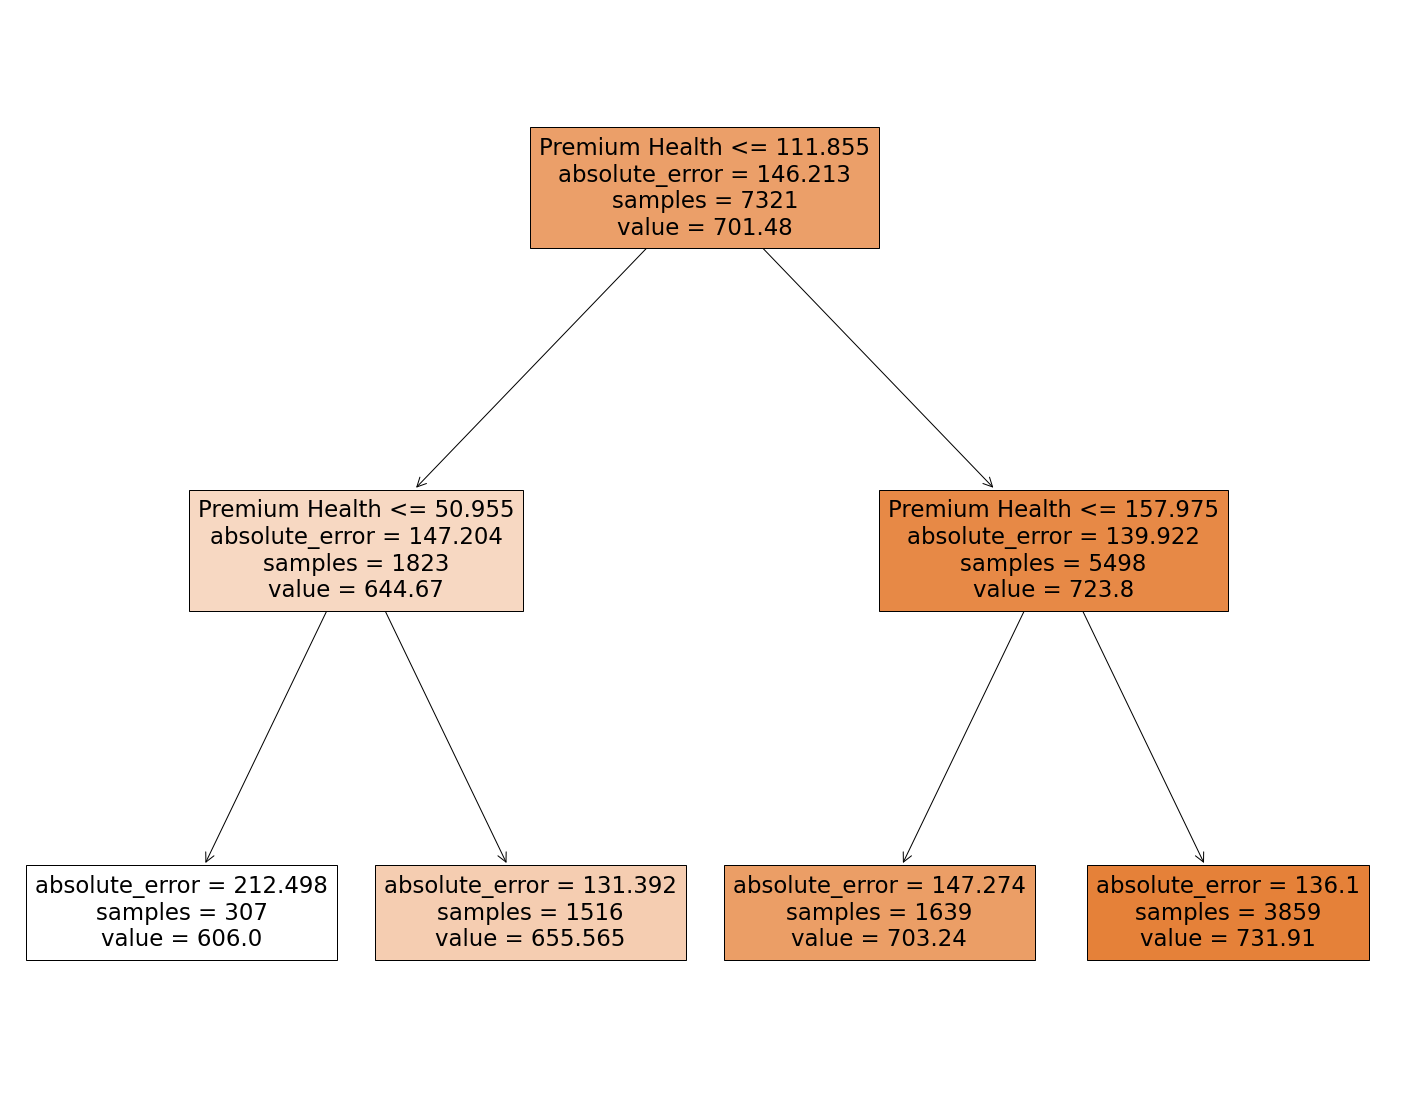

In [45]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(lob_health_reg_gs.best_estimator_, feature_names=['Premium Health'], class_names=['Total Premium'], filled=True)

It's possible to see that the Health Premium is harder to bin, based on the absolute error values.  
[!] Insight

Due to the insight above, it doesn't make sense to divide this hard to bin class into 8 classes, when 4 do the trick.  
Health Rules:
   * CLASS A: $P > €156 $
   * CLASS B: $€95.3 < P <= €156$
   * CLASS C: $€47.2 < P <= €95.3$
   * CLASS D: $P <= €47.2$

In [46]:
col = 'amt_plob_health'
conditions_health = [dfInsurance[col] > 156, 
              (dfInsurance[col] > 95.3) & (dfInsurance[col] <= 156), 
              (dfInsurance[col] > 47.2) & (dfInsurance[col] <= 95.3),
              (dfInsurance[col] > 0) & (dfInsurance[col] <= 47.2),
              (dfInsurance[col] == 0),
              (dfInsurance[col] < 0)]
choices = ['A', 'B', 'C', 'D', 'ZEROS','NEGATIVES']
dfInsurance["fe_bin_plob_health"] = np.select(conditions_health, choices, default=np.nan)

choices = [4, 3, 2, 1, 0, -1]
dfInsurance["fe_int_plob_health_b"] = np.select(conditions_health, choices, default=np.nan)
dfInsurance["fe_int_plob_health_a"] = dfInsurance["fe_int_plob_health_b"]-1

g = dfInsurance.groupby(['DATA_MAIN_CUT', 'fe_bin_plob_health'])['amt_plob_health']
min_, max_ = g.transform('min'), g.transform('max')
dfInsurance['fe_amt_plob_health' + '_scale'] = round((((dfInsurance["fe_int_plob_health_b"]-dfInsurance["fe_int_plob_health_a"])*(dfInsurance['amt_plob_health'] - min_)) / 
                                                (max_ - min_)) + dfInsurance["fe_int_plob_health_a"],5)
dfInsurance.drop(columns = ['fe_int_plob_health_a', 'fe_int_plob_health_b'], inplace=True)
dfInsurance['fe_amt_plob_health' + '_scale'] = dfInsurance['fe_amt_plob_health' + '_scale'].fillna(0)

### LOB: Work Compensation

In [47]:
params = {'max_depth':[1,2,3], 'min_samples_leaf':[10], 'criterion':['absolute_error','squared_error','poisson']}
lob_wcomp_reg = DecisionTreeRegressor(random_state=42)
lob_wcomp_reg_gs = GridSearchCV(lob_wcomp_reg, param_grid=params, scoring='r2')
lob_wcomp_reg_gs.fit(dfInsuranceTrain[['amt_plob_wcomp']], dfInsuranceTrain['amt_premium_total'])

GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'criterion': ['absolute_error', 'squared_error',
                                       'poisson'],
                         'max_depth': [1, 2, 3], 'min_samples_leaf': [10]},
             scoring='r2')

In [48]:
lob_wcomp_reg_gs.best_params_

{'criterion': 'absolute_error', 'max_depth': 3, 'min_samples_leaf': 10}

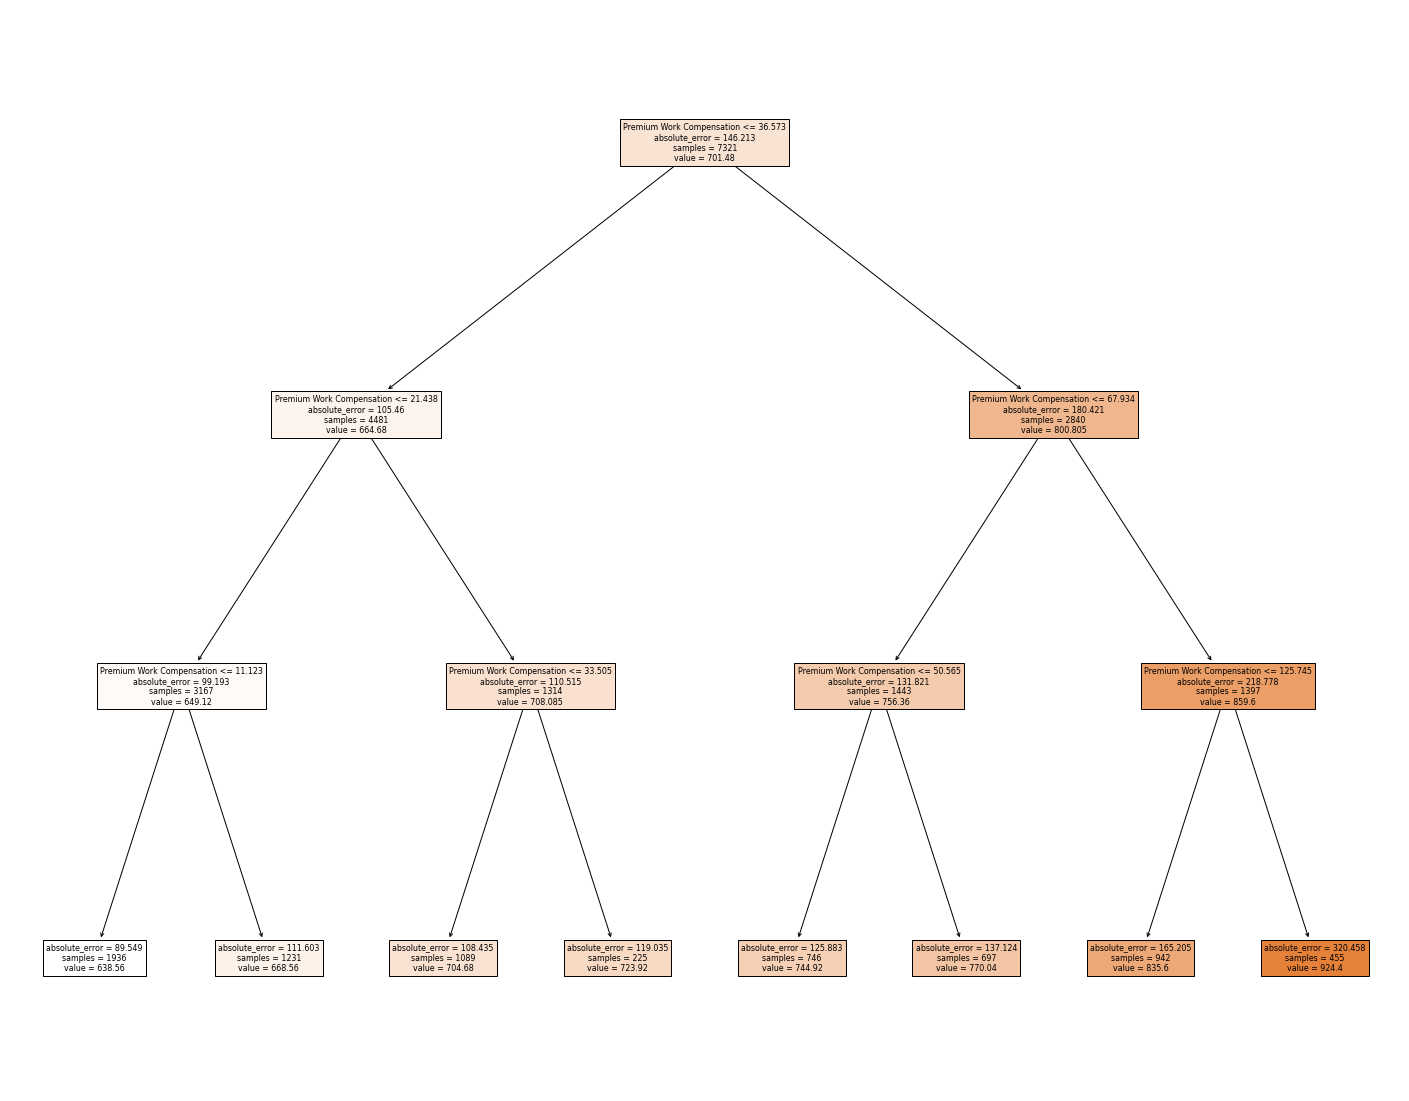

In [49]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(lob_wcomp_reg_gs.best_estimator_, feature_names=['Premium Work Compensation'], class_names=['Total Premium'], filled=True)

In this case, it does make sense to partition in the lower Premiums, but in the "higher" premiums, it's unecessary partitioning.

Due to the insight above, it doesn't make sense to divide this hard to bin class into 8 classes, when 4 do the trick.  
Health Rules:
   * CLASS A: $P > €69 $
   * CLASS B: $€44.68 < P <= €69$
   * CLASS C: $€22.11 < P <= €44.68$
   * CLASS D: $€6.33 < P <= €22.11$
   * CLASS E: $P <= €6.33$

In [50]:
col = 'amt_plob_wcomp'
conditions_wcomp = [dfInsurance[col] > 69, 
              (dfInsurance[col] > 44.68) & (dfInsurance[col] <= 69), 
              (dfInsurance[col] > 22.11) & (dfInsurance[col] <= 44.68),
              (dfInsurance[col] > 6.33) & (dfInsurance[col] <= 22.11),
              (dfInsurance[col] > 0) & (dfInsurance[col] <= 6.33),
              (dfInsurance[col] == 0),
              (dfInsurance[col] < 0)]

choices = ['A', 'B', 'C', 'D', 'E', 'ZEROS','NEGATIVES']
dfInsurance["fe_bin_plob_wcomp"] = np.select(conditions_wcomp, choices, default=np.nan)

choices = [5, 4, 3, 2, 1, 0, -1]
dfInsurance["fe_int_plob_wcomp_b"] = np.select(conditions_wcomp, choices, default=np.nan)
dfInsurance["fe_int_plob_wcomp_a"] = dfInsurance["fe_int_plob_wcomp_b"]-1

g = dfInsurance.groupby(['DATA_MAIN_CUT', 'fe_bin_plob_wcomp'])['amt_plob_wcomp']
min_, max_ = g.transform('min'), g.transform('max')
dfInsurance['fe_amt_plob_wcomp' + '_scale'] = round((((dfInsurance["fe_int_plob_wcomp_b"]-dfInsurance["fe_int_plob_wcomp_a"])*(dfInsurance['amt_plob_wcomp'] - min_)) / 
                                                (max_ - min_)) + dfInsurance["fe_int_plob_wcomp_a"],5)
dfInsurance.drop(columns = ['fe_int_plob_wcomp_a', 'fe_int_plob_wcomp_b'], inplace=True)
dfInsurance['fe_amt_plob_wcomp' + '_scale'] = dfInsurance['fe_amt_plob_wcomp' + '_scale'].fillna(0)

### LOB: Household

In [51]:
params = {'max_depth':[1,2,3], 'min_samples_leaf':[10], 'criterion':['absolute_error','squared_error','poisson']}
lob_household_reg = DecisionTreeRegressor(random_state=42)
lob_household_reg_gs = GridSearchCV(lob_household_reg, param_grid=params, scoring='r2')
lob_household_reg_gs.fit(dfInsuranceTrain[['amt_plob_household']], dfInsuranceTrain['amt_premium_total'])

GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'criterion': ['absolute_error', 'squared_error',
                                       'poisson'],
                         'max_depth': [1, 2, 3], 'min_samples_leaf': [10]},
             scoring='r2')

In [52]:
lob_household_reg_gs.best_params_

{'criterion': 'absolute_error', 'max_depth': 3, 'min_samples_leaf': 10}

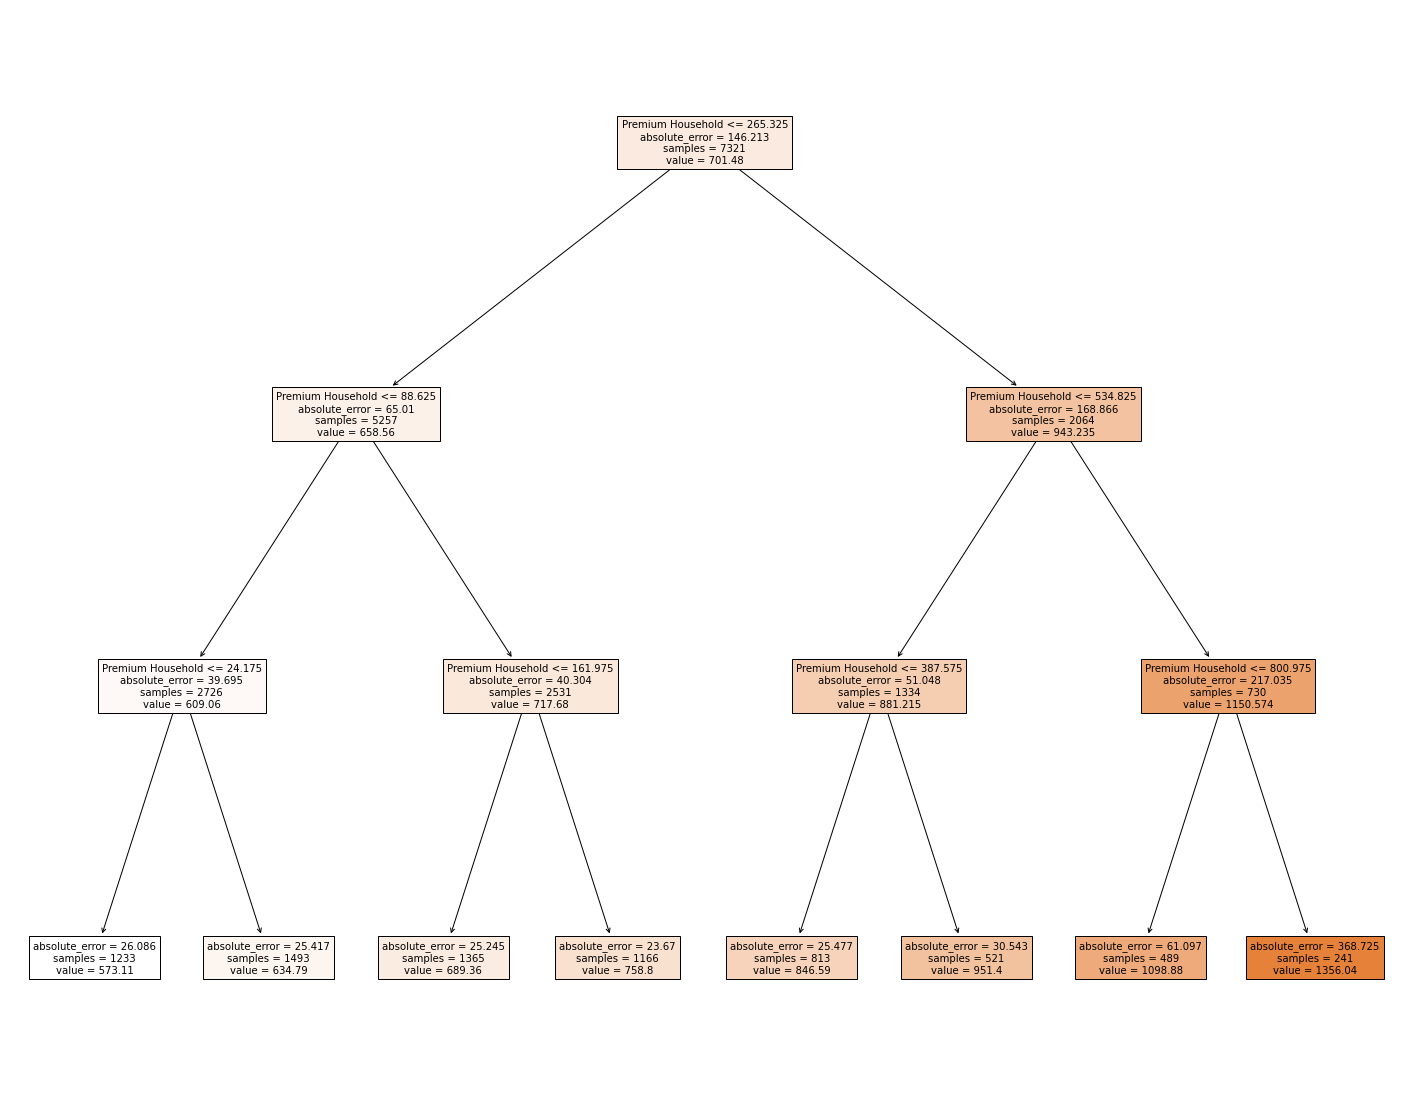

In [53]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(lob_household_reg_gs.best_estimator_, feature_names=['Premium Household'], class_names=['Total Premium'], filled=True)


Household Rules:
   * CLASS A: $P > €529.8 $
   * CLASS B: $€368.1 < P <= €529.8$
   * CLASS C: $€255.3 < P <= €368.1$
   * CLASS D: $€157.5 < P <= €255.3$
   * CLASS E: $€88.6 < P <= €157.5$
   * CLASS F: $€19.2 < P <= 88.6$
   * CLASS G: $€19.2 < P$

In [54]:
col = 'amt_plob_household'
conditions_household = [dfInsurance[col] > 529.8, 
              (dfInsurance[col] > 368.1) & (dfInsurance[col] <= 529.8), 
              (dfInsurance[col] > 255.3) & (dfInsurance[col] <= 368.1),
              (dfInsurance[col] > 157.5) & (dfInsurance[col] <= 255.3),
              (dfInsurance[col] > 88.6) & (dfInsurance[col] <= 157.5),
              (dfInsurance[col] > 19.2) & (dfInsurance[col] <= 88.6),
              (dfInsurance[col] > 0) & (dfInsurance[col] <= 19.2),
              (dfInsurance[col] == 0),
              (dfInsurance[col] < 0)]

choices = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'ZEROS','NEGATIVES']
dfInsurance["fe_bin_plob_household"] = np.select(conditions_household, choices, default=np.nan)

choices = [7, 6, 5, 4, 3, 2, 1, 0, -1]
dfInsurance["fe_int_plob_household_b"] = np.select(conditions_household, choices, default=np.nan)
dfInsurance["fe_int_plob_household_a"] = dfInsurance["fe_int_plob_household_b"]-1

g = dfInsurance.groupby(['DATA_MAIN_CUT', 'fe_bin_plob_household'])['amt_plob_household']
min_, max_ = g.transform('min'), g.transform('max')
dfInsurance['fe_amt_plob_household' + '_scale'] = round((((dfInsurance["fe_int_plob_household_b"]-dfInsurance["fe_int_plob_household_a"])*(dfInsurance['amt_plob_household'] - min_)) / 
                                                (max_ - min_)) + dfInsurance["fe_int_plob_household_a"],5)
dfInsurance.drop(columns = ['fe_int_plob_household_a', 'fe_int_plob_household_b'], inplace=True)
dfInsurance['fe_amt_plob_household' + '_scale'] = dfInsurance['fe_amt_plob_household' + '_scale'].fillna(0)

## Customer Monetary Value And Claims Rate: Quadrant Breaker

In [56]:
m_slope = -525.5
rt_cut = 1
b_base = 500
conditions = [(dfInsurance['rt_cr'] >= rt_cut) & (dfInsurance['amt_cmv'] > ((m_slope)*dfInsurance['rt_cr']+b_base)), # Q1
              (dfInsurance['rt_cr'] >= rt_cut) & (dfInsurance['amt_cmv'] <= ((m_slope)*dfInsurance['rt_cr']+b_base)), # Q4
              (dfInsurance['rt_cr'] < rt_cut) & (dfInsurance['amt_cmv'] > ((m_slope)*dfInsurance['rt_cr']+b_base)), # Q2
              (dfInsurance['rt_cr'] < rt_cut) & (dfInsurance['amt_cmv'] <= ((m_slope)*dfInsurance['rt_cr']+b_base))] # Q3
choices = ['Q1', 'Q4', 'Q2', 'Q3']

dfInsurance["fe_cmv_cr_quadrant_Type1"] = np.select(conditions, choices, default=np.nan)


m_slope = -970
rt_cut = 0.6
b_base = 1050
conditions = [(dfInsurance['rt_cr'] >= rt_cut) & (dfInsurance['amt_cmv'] > ((m_slope)*dfInsurance['rt_cr']+b_base)), # Q1
              (dfInsurance['rt_cr'] >= rt_cut) & (dfInsurance['amt_cmv'] <= ((m_slope)*dfInsurance['rt_cr']+b_base)), # Q4
              (dfInsurance['rt_cr'] < rt_cut) & (dfInsurance['amt_cmv'] > ((m_slope)*dfInsurance['rt_cr']+b_base)), # Q2
              (dfInsurance['rt_cr'] < rt_cut) & (dfInsurance['amt_cmv'] <= ((m_slope)*dfInsurance['rt_cr']+b_base))] # Q3
choices = ['Q1', 'Q4', 'Q2', 'Q3']

dfInsurance["fe_cmv_cr_quadrant_Type2"] = np.select(conditions, choices, default=np.nan)

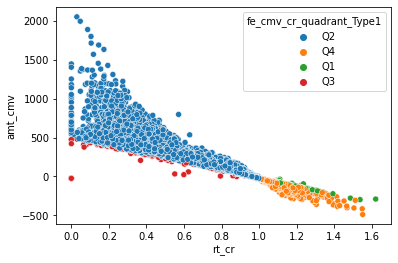

In [57]:
sns.scatterplot(data=dfInsurance.loc[dfInsurance['DATA_MAIN_CUT'] == 'KEEP'], x='rt_cr', y = 'amt_cmv', hue = 'fe_cmv_cr_quadrant_Type1')
plt.show()

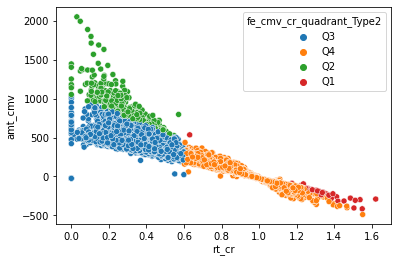

In [58]:
sns.scatterplot(data=dfInsurance.loc[dfInsurance['DATA_MAIN_CUT'] == 'KEEP'], x='rt_cr', y = 'amt_cmv', hue = 'fe_cmv_cr_quadrant_Type2')
plt.show()

## Date offset

Current Age = Customer Age + (Reference Year - First Policy Year)

In [59]:
dfInsurance['atr_current_age'] = dfInsurance['atr_cust_age'] + dfInsurance['atr_fpy_to_date']
dfInsurance['atr_current_age'] = dfInsurance['atr_current_age'].astype('int64')

## Customer Age intervals

In [126]:
dfInsurance['age_binned'] = pd.qcut(x = dfInsurance['atr_cust_age'], q = 4)

In [128]:
dfInsurance['age_binned'].value_counts(ascending=True).sort_index(ascending=True)

(14.999, 33.0]    2658
(33.0, 48.0]      2536
(48.0, 63.0]      2660
(63.0, 81.0]      2437
Name: age_binned, dtype: int64

# Distribution of features

## Filters: Visualizations

#### Customer Monetary Value

Text(0.5, 0.98, 'Gross Monthly Salary')

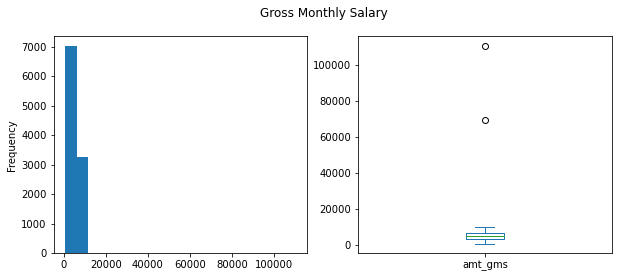

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
dfInsurance['amt_gms'].plot(kind='hist', bins=20, ax=axes[0])
dfInsurance['amt_gms'].plot(kind='box', ax=axes[1])
plt.suptitle("Gross Monthly Salary")


#### Customer Monetary Value

Text(0.5, 0.98, 'Customer Monetary Value')

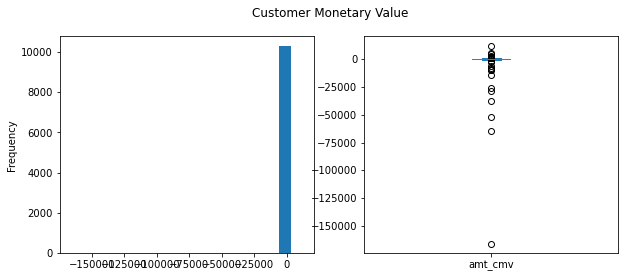

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
dfInsurance['amt_cmv'].plot(kind='hist', bins=20, ax=axes[0])
dfInsurance['amt_cmv'].plot(kind='box', ax=axes[1])
plt.suptitle("Customer Monetary Value")


#### Claims Rate

Text(0.5, 0.98, 'Claims Rate')

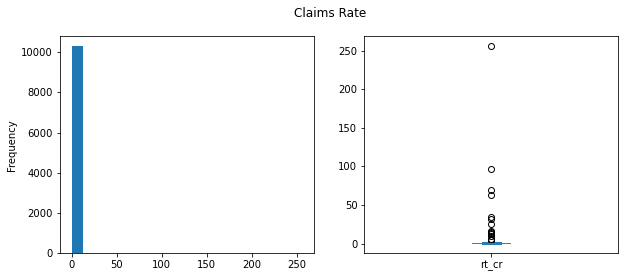

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
dfInsurance['rt_cr'].plot(kind='hist', bins=20, ax=axes[0])
dfInsurance['rt_cr'].plot(kind='box', ax=axes[1])
plt.suptitle("Claims Rate")


#### Premiums Motor

Text(0.5, 0.98, 'Motor premiums')

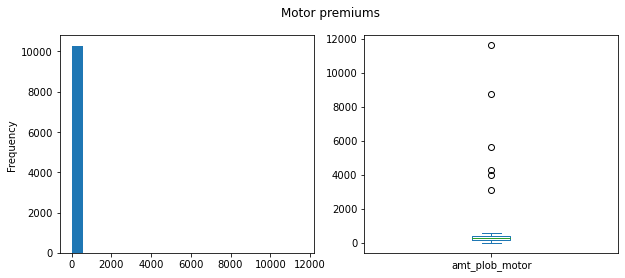

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
dfInsurance['amt_plob_motor'].plot(kind='hist', bins=20, ax=axes[0])
dfInsurance['amt_plob_motor'].plot(kind='box', ax=axes[1])
plt.suptitle("Motor premiums")


#### Premiums household

Text(0.5, 0.98, 'Household premiums')

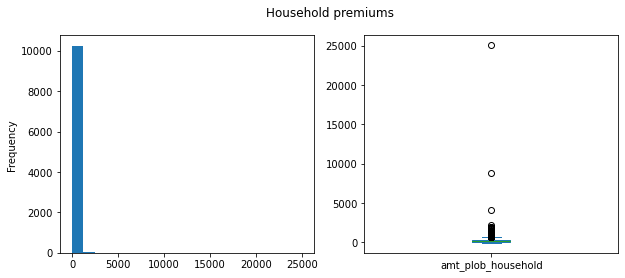

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
dfInsurance['amt_plob_household'].plot(kind='hist', bins=20, ax=axes[0])
dfInsurance['amt_plob_household'].plot(kind='box', ax=axes[1])
plt.suptitle("Household premiums")


#### Premiums health

Text(0.5, 0.98, 'Health premiums')

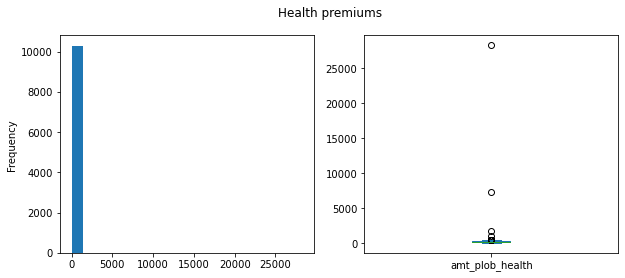

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
dfInsurance['amt_plob_health'].plot(kind='hist', bins=20, ax=axes[0])
dfInsurance['amt_plob_health'].plot(kind='box', ax=axes[1])
plt.suptitle("Health premiums")


#### Premiums life

Text(0.5, 0.98, 'Life premiums')

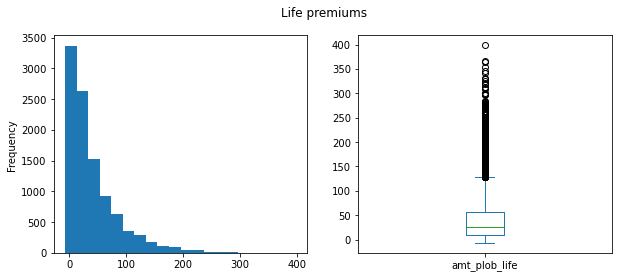

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
dfInsurance['amt_plob_life'].plot(kind='hist', bins=20, ax=axes[0])
dfInsurance['amt_plob_life'].plot(kind='box', ax=axes[1])
plt.suptitle("Life premiums")


#### Premiums Work Compensation

Text(0.5, 0.98, 'Work Compensation premiums')

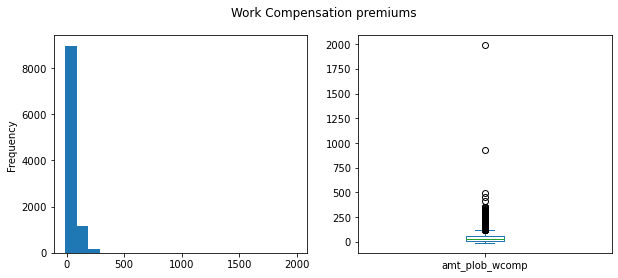

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
dfInsurance['amt_plob_wcomp'].plot(kind='hist', bins=20, ax=axes[0])
dfInsurance['amt_plob_wcomp'].plot(kind='box', ax=axes[1])
plt.suptitle("Work Compensation premiums")


## Outliers: Visualisations


### Outliers premiums Life

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='atr_cust_age', ylabel='amt_plob_life'>

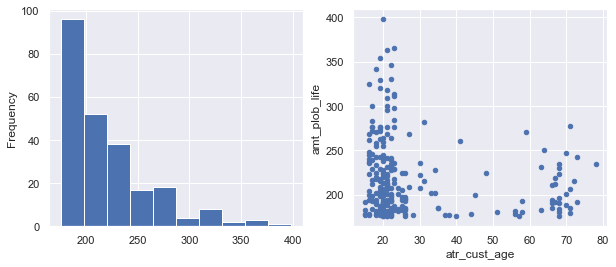

In [177]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
dfInsurance.loc[dfInsurance['outlier_candidate'] == 'amt_plob_life']['amt_plob_life'].plot(kind='hist', ax=axes[0])
dfInsurance.loc[dfInsurance['outlier_candidate'] == 'amt_plob_life'].plot(kind="scatter", x='atr_cust_age', y='amt_plob_life', ax=axes[1])

### Outliers premiums Motor

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='atr_cust_age', ylabel='amt_plob_motor'>

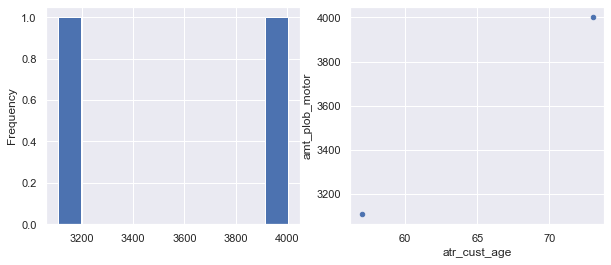

In [176]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
dfInsurance.loc[dfInsurance['outlier_candidate'] == 'amt_plob_motor']['amt_plob_motor'].plot(kind='hist', ax=axes[0])
dfInsurance.loc[dfInsurance['outlier_candidate'] == 'amt_plob_motor'].plot(kind="scatter", x='atr_cust_age', y='amt_plob_motor', ax=axes[1])

### Outliers premiums Health

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='atr_cust_age', ylabel='amt_plob_health'>

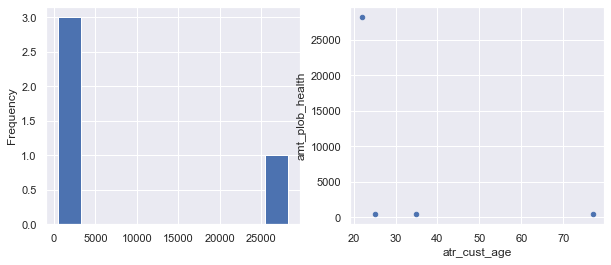

In [178]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
dfInsurance.loc[dfInsurance['outlier_candidate'] == 'amt_plob_health']['amt_plob_health'].plot(kind='hist', ax=axes[0])
dfInsurance.loc[dfInsurance['outlier_candidate'] == 'amt_plob_health'].plot(kind="scatter", x='atr_cust_age', y='amt_plob_health', ax=axes[1])

### Outliers premiums Household

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='atr_cust_age', ylabel='amt_plob_household'>

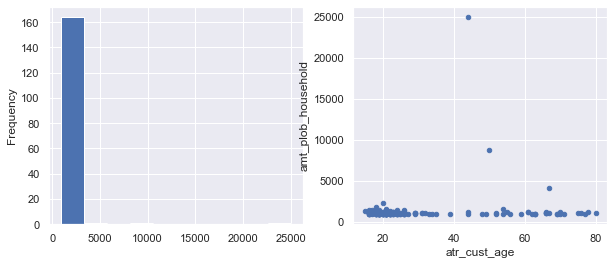

In [179]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
dfInsurance.loc[dfInsurance['outlier_candidate'] == 'amt_plob_household']['amt_plob_household'].plot(kind='hist', ax=axes[0])
dfInsurance.loc[dfInsurance['outlier_candidate'] == 'amt_plob_household'].plot(kind="scatter", x='atr_cust_age', y='amt_plob_household', ax=axes[1])

### Outliers premiums Work compensation

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='atr_cust_age', ylabel='amt_plob_wcomp'>

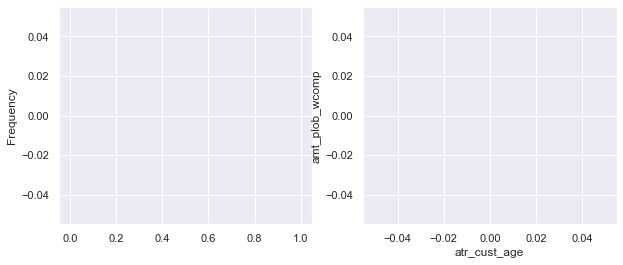

In [180]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
dfInsurance.loc[dfInsurance['outlier_candidate'] == 'amt_plob_wcomp']['amt_plob_wcomp'].plot(kind='hist', ax=axes[0])
dfInsurance.loc[dfInsurance['outlier_candidate'] == 'amt_plob_wcomp'].plot(kind="scatter", x='atr_cust_age', y='amt_plob_wcomp', ax=axes[1])

There were no outlier candidates present

## Feature Engineering: Visualisations

### Premium LOB's Binning

### Motor

<Figure size 1800x1440 with 0 Axes>

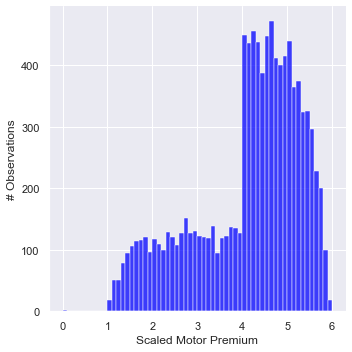

In [181]:
fig = plt.figure(figsize=(25,20))
sns.displot(dfInsurance['fe_amt_plob_motor_scale'], kind = 'hist', 
             color = 'blue', bins = int(60))

plt.xlabel("Scaled Motor Premium")
plt.ylabel("# Observations")

plt.show()

### Life

<Figure size 1800x1440 with 0 Axes>

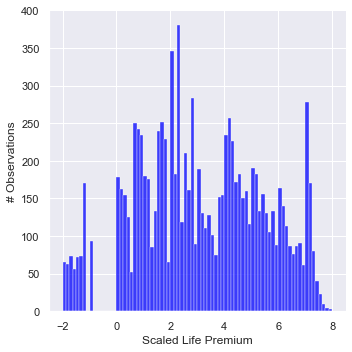

In [182]:
fig = plt.figure(figsize=(25,20))
sns.displot(dfInsurance['fe_amt_plob_life_scale'], kind = 'hist', 
             color = 'blue', bins = int(80))

plt.xlabel("Scaled Life Premium")
plt.ylabel("# Observations")

plt.show()

### Health

<Figure size 1800x1440 with 0 Axes>

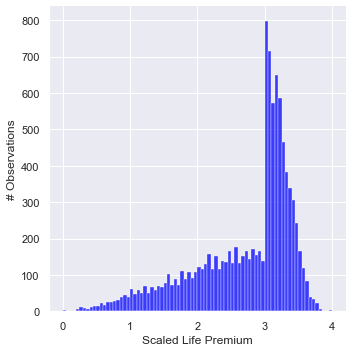

In [183]:
fig = plt.figure(figsize=(25,20))
sns.displot(dfInsurance['fe_amt_plob_health_scale'], kind = 'hist', 
             color = 'blue', bins = int(80))

plt.xlabel("Scaled Life Premium")
plt.ylabel("# Observations")

plt.show()

### Household

<Figure size 1800x1440 with 0 Axes>

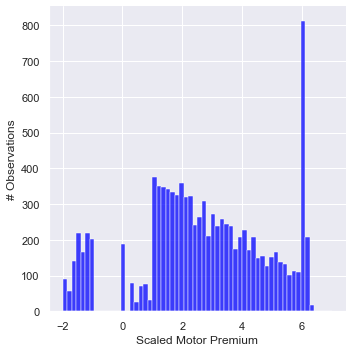

In [184]:
fig = plt.figure(figsize=(25,20))
sns.displot(dfInsurance['fe_amt_plob_household_scale'], kind = 'hist', 
             color = 'blue', bins = int(60))

plt.xlabel("Scaled Motor Premium")
plt.ylabel("# Observations")

plt.show()

### Work compensation

<Figure size 1800x1440 with 0 Axes>

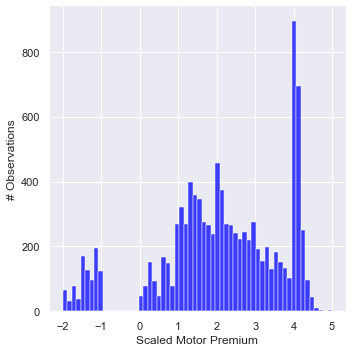

In [185]:
fig = plt.figure(figsize=(25,20))
sns.displot(dfInsurance['fe_amt_plob_wcomp_scale'], kind = 'hist', 
             color = 'blue', bins = int(60))

plt.xlabel("Scaled Motor Premium")
plt.ylabel("# Observations")

plt.show()

## First Policy's Year


In [101]:
min_FPY = min(dfInsurance['dt_fpy'])
max_FPY = max(dfInsurance['dt_fpy'])
n_bins = max_FPY - min_FPY

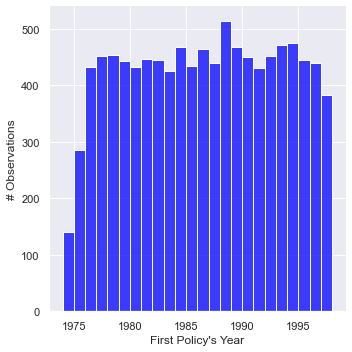

In [102]:
%matplotlib inline
sns.displot(dfInsurance['dt_fpy'], kind = 'hist',
             color = 'blue', bins = int(n_bins))

plt.xlabel("First Policy's Year")
plt.ylabel("# Observations")

plt.show()

## Customer Age

In [103]:
min_CustA = min(dfInsurance['atr_cust_age'])
max_CustA = max(dfInsurance['atr_cust_age'])
n_bins = max_CustA - min_CustA

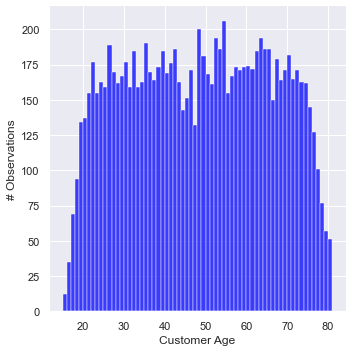

In [104]:
sns.displot(dfInsurance['atr_cust_age'], kind = 'hist', 
             color = 'blue', bins = int(n_bins))

plt.xlabel("Customer Age")
plt.ylabel("# Observations")

plt.show()

### Date offset

In [92]:
min_CustA = min(dfInsurance['atr_current_age'])
max_CustA = max(dfInsurance['atr_current_age'])
n_bins = max_CustA - min_CustA

<Figure size 1800x1440 with 0 Axes>

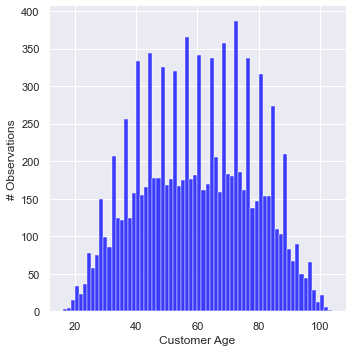

In [186]:
fig = plt.figure(figsize=(25,20))
sns.displot(dfInsurance['atr_current_age'], kind = 'hist', 
             color = 'blue', bins = int(n_bins))

plt.xlabel("Customer Age")
plt.ylabel("# Observations")

plt.show()

Based on the distributions above new variables were created as scaled versions of the originals:

## Logarithm Features

Logged features: 
* LOB Premium: Life
* LOB Premium: Household
* LOB Premium: Work Compensation
* LOB: Total
* LOB Rate: Life
* LOB Rate: Household
* LOB Rate: Motor
* LOB Rate: Health
* LOB Rate: Work Compensation

In [60]:
dfInsurance['log_amt_plob_life'] = np.where(min(dfInsurance['amt_plob_life']) <= 0,
np.log(dfInsurance['amt_plob_life'] + abs(min(dfInsurance['amt_plob_life'])) + 1),
np.log(abs(dfInsurance['amt_plob_life'])))

dfInsurance['log_amt_plob_household'] = np.where(min(dfInsurance['amt_plob_household']) <= 0,
np.log(dfInsurance['amt_plob_household'] + abs(min(dfInsurance['amt_plob_household'])) + 1),
np.log(abs(dfInsurance['amt_plob_household'])))

dfInsurance['log_amt_plob_wcomp'] = np.where(min(dfInsurance['amt_plob_wcomp']) <= 0,
np.log(dfInsurance['amt_plob_wcomp'] + abs(min(dfInsurance['amt_plob_wcomp'])) + 1),
np.log(abs(dfInsurance['amt_plob_wcomp'])))

dfInsurance['log_amt_premium_total'] = np.where(min(dfInsurance['amt_premium_total']) <= 0,
np.log(dfInsurance['amt_premium_total'] + abs(min(dfInsurance['amt_premium_total'])) + 1),
np.log(abs(dfInsurance['amt_premium_total'])))

dfInsurance['log_rt_plob_life'] = np.where(min(dfInsurance['rt_plob_life']) <= 0,
np.log(dfInsurance['rt_plob_life'] + abs(min(dfInsurance['rt_plob_life'])) + 1),
np.log(abs(dfInsurance['rt_plob_life'])))

dfInsurance['log_rt_plob_household'] = np.where(min(dfInsurance['rt_plob_household']) <= 0,
np.log(dfInsurance['rt_plob_household'] + abs(min(dfInsurance['rt_plob_household'])) + 1),
np.log(abs(dfInsurance['rt_plob_household'])))

dfInsurance['log_rt_plob_motor'] = np.where(min(dfInsurance['rt_plob_motor']) <= 0,
np.log(dfInsurance['rt_plob_motor'] + abs(min(dfInsurance['rt_plob_motor'])) + 1),
np.log(abs(dfInsurance['rt_plob_motor'])))

dfInsurance['log_rt_plob_health'] = np.where(min(dfInsurance['rt_plob_health']) <= 0,
np.log(dfInsurance['rt_plob_health'] + abs(min(dfInsurance['rt_plob_health'])) + 1),
np.log(abs(dfInsurance['rt_plob_health'])))

dfInsurance['log_rt_plob_wcomp'] = np.where(min(dfInsurance['rt_plob_wcomp']) <= 0,
np.log(dfInsurance['rt_plob_wcomp'] + abs(min(dfInsurance['rt_plob_wcomp'])) + 1),
np.log(abs(dfInsurance['rt_plob_wcomp'])))

C:\Users\PedroSantos\anaconda3\envs\dsacademy\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\PedroSantos\anaconda3\envs\dsacademy\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## MinMax scale features

Scaled features:
* LOB Premium: Health
* LOB Premium: Motor
* Gross Monthly Salary
* Customer Age
* First Policy Year
* First Policy Year to reference year

In [61]:
scaler = MinMaxScaler()
dfInsurance['minmax_amt_plob_health'] = scaler.fit_transform(dfInsurance[['amt_plob_health']])
dfInsurance['minmax_amt_plob_motor'] = scaler.fit_transform(dfInsurance[['amt_plob_motor']])
dfInsurance['minmax_amt_gms'] = scaler.fit_transform(dfInsurance[['amt_gms']])
dfInsurance['minmax_atr_cust_age'] = scaler.fit_transform(dfInsurance[['atr_cust_age']])
dfInsurance['minmax_dt_fpy'] = scaler.fit_transform(dfInsurance[['dt_fpy']])
dfInsurance['minmax_fpy_to_date'] = scaler.fit_transform(dfInsurance[['atr_fpy_to_date']])

## Square Root Features

Rooted features:
* Customer Monetary Value

In [62]:
dfInsurance['sqrt_amt_cmv'] = np.where(min(dfInsurance['amt_cmv']) <= 0,
np.sqrt(dfInsurance['amt_cmv'] + abs(min(dfInsurance['amt_cmv'])) + 1),
np.sqrt(dfInsurance['amt_cmv']))

C:\Users\PedroSantos\anaconda3\envs\dsacademy\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


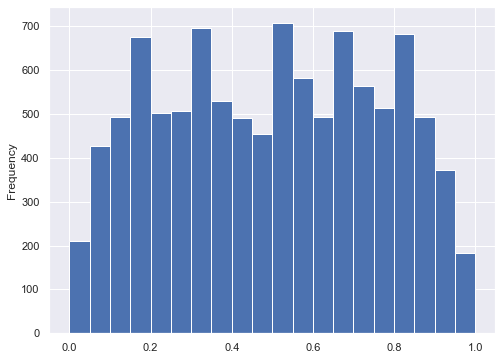

In [216]:
dfInsurance.loc[dfInsurance['DATA_MAIN_CUT'] == 'KEEP']['minmax_atr_cust_age'].plot(kind='hist', bins=20, figsize=(8,6))
plt.show()

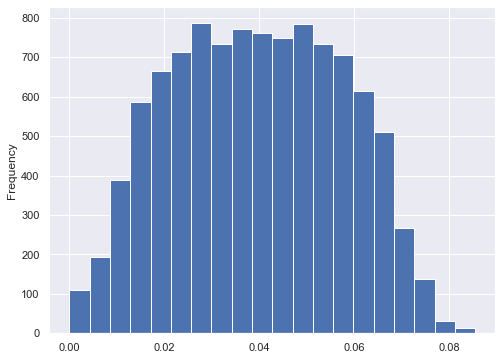

In [215]:
dfInsurance.loc[dfInsurance['DATA_MAIN_CUT'] == 'KEEP']['minmax_amt_gms'].plot(kind='hist', bins=20, figsize=(8,6))
plt.show()

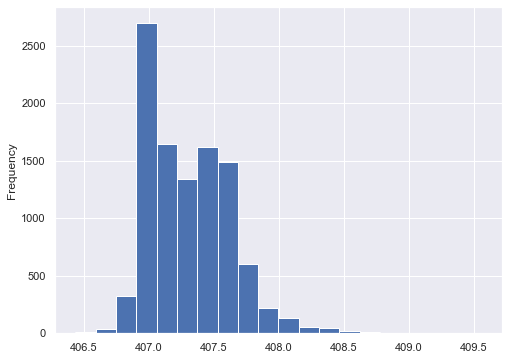

In [217]:
dfInsurance.loc[dfInsurance['DATA_MAIN_CUT'] == 'KEEP']['sqrt_amt_cmv'].plot(kind='hist', bins=20, figsize=(8,6))
plt.show()

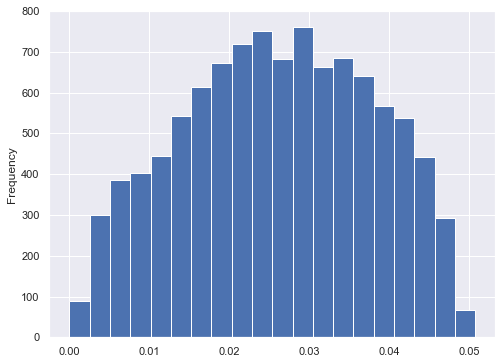

In [214]:
dfInsurance.loc[dfInsurance['DATA_MAIN_CUT'] == 'KEEP']['minmax_amt_plob_motor'].plot(kind='hist', bins=20, figsize=(8,6))
plt.show()

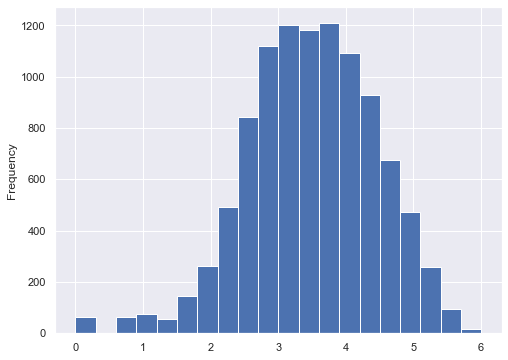

In [213]:
dfInsurance.loc[dfInsurance['DATA_MAIN_CUT'] == 'KEEP']['log_amt_plob_life'].plot(kind='hist', bins=20, figsize=(8,6))
plt.show()

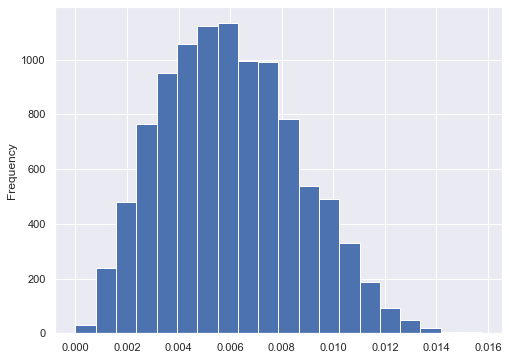

In [212]:
dfInsurance.loc[dfInsurance['DATA_MAIN_CUT'] == 'KEEP']['minmax_amt_plob_health'].plot(kind='hist', bins=20, figsize=(8,6))
plt.show()

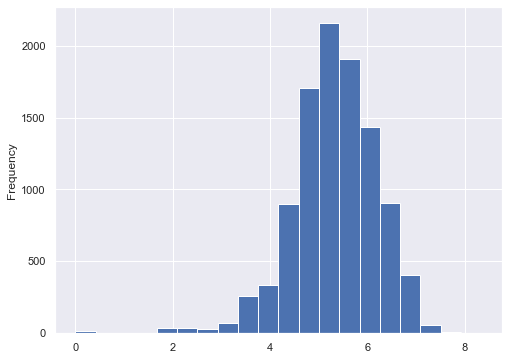

In [211]:
dfInsurance.loc[dfInsurance['DATA_MAIN_CUT'] == 'KEEP']['log_amt_plob_household'].plot(kind='hist', bins=20, figsize=(8,6))
plt.show()

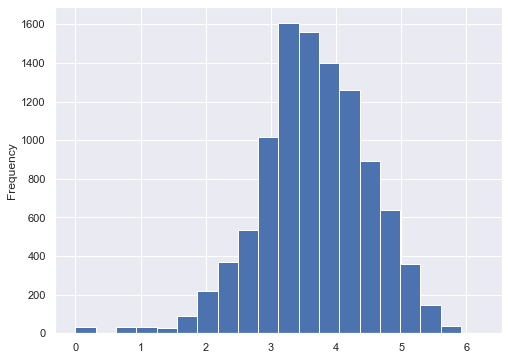

In [210]:
dfInsurance.loc[dfInsurance['DATA_MAIN_CUT'] == 'KEEP']['log_amt_plob_wcomp'].plot(kind='hist', bins=20, figsize=(8,6))
plt.show()

## FeatureTools - Discontinued

In [63]:
# import featuretools as ft

# # Make an entityset and add the entity
# es = ft.EntitySet(id = 'insurance')
# es.add_dataframe(dataframe = dfInsuranceA, dataframe_name = 'insuranceData',
#                          make_index = True, index = 'index')


In [64]:
# # Run deep feature synthesis with transformation primitives
# feature_matrix, feature_defs = ft.dfs(entityset = es, target_dataframe_name = 'insuranceData',
#                                       trans_primitives = ['add_numeric', 'multiply_numeric'])

# feature_matrix.head()

In [187]:
# fig = plt.figure(figsize=(25,20))
# plot_columns = [column for column in dfInsurance.columns if column in ['rt_plob_life', 'rt_plob_motor', 'amt_premium_total', 'amt_cmv', 'amt_gms', 'atr_cust_age', 'rt_plob_household']]
# g = sns.pairplot(data=dfInsurance,
#             y_vars=['atr_current_age'],
#             x_vars=plot_columns)

# for ax, lbl in zip(g.axes.flatten(), [*plot_columns]):
#     # print(ax, lbl)
#     ax.set_xlabel(f'{columns_map_reverse[lbl]}')